In [31]:
import pandas as pd
import numpy as np

inpDf = pd.read_csv('2017_jun_final - 2017_jun_final.csv')
inpDf.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [32]:
inpDf.shape

(8704, 25)

In [33]:
inpDf.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [86]:
newDf = inpDf.drop(inpDf.columns[(inpDf.isnull().sum() != 0) & (inpDf.columns != 'Мова програмування')].tolist(), axis=1)
newDf.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [90]:
newDf.dropna(inplace=True)
newDf.shape

(4854, 20)

In [92]:
python_data = newDf.loc[newDf['Мова програмування'] == 'Python']
python_data.shape

(207, 20)

In [101]:
python_data.groupby(by='Посада')

In [120]:
new_df = python_data.groupby(by='Посада')
new_df = new_df['Зарплата на місяць'].agg(['min','max'])
new_df

,min,max
Посада,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


In [127]:
def fill_avg_salary(series):
    return series.mean()


new_df["avg"] = python_data.groupby(by='Посада')['Зарплата на місяць'].apply('mean')
new_df.round(2)

,min,max,avg
Посада,,,
Junior Software Engineer,100,1250,560.84
Senior Software Engineer,1300,9200,3387.10
Software Engineer,500,5400,1799.07
System Architect,3000,5000,4000.00
Technical Lead,1425,6200,3165.91


In [129]:
new_df.describe()

,min,max,avg
count,5.000000,5.000000,5.000000
mean,1265.000000,5410.000000,2582.583427
std,1115.739665,2848.771665,1387.255829
min,100.000000,1250.000000,560.841270
25%,500.000000,5000.000000,1799.070000
50%,1300.000000,5400.000000,3165.909091
75%,1425.000000,6200.000000,3387.096774
max,3000.000000,9200.000000,4000.000000


In [128]:
new_df.to_csv('result_2.2.csv')

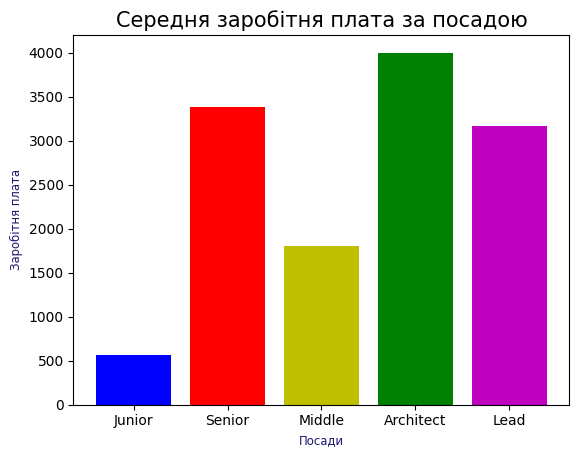

In [144]:
import matplotlib.pyplot as plt
plt.bar(
    ['Junior', 'Senior', 'Middle', 'Architect', 'Lead'],
    new_df['avg'],
    color=["b", "r", "y", "g", "m"],
)

plt.xlabel("Посади", fontsize="small", color="midnightblue")
plt.ylabel("Заробітня плата", fontsize="small", color="midnightblue")
plt.title("Середня заробітня плата за посадою", fontsize=15)
plt.show()

<Axes: xlabel='exp'>

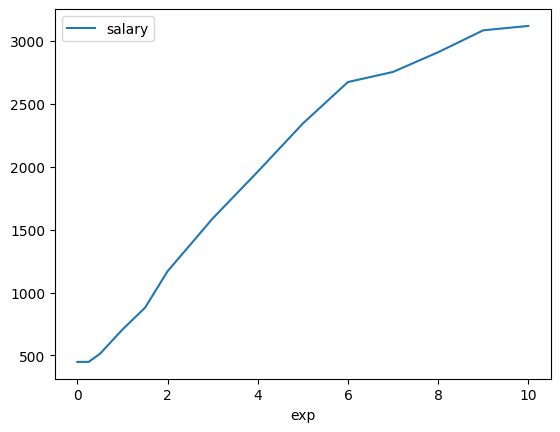

In [151]:
import seaborn as sns
sns.lineplot(data=inpDf[['exp', 'salary']].groupby(by='exp').mean())


<Axes: xlabel='Тип компанії', ylabel='salary'>

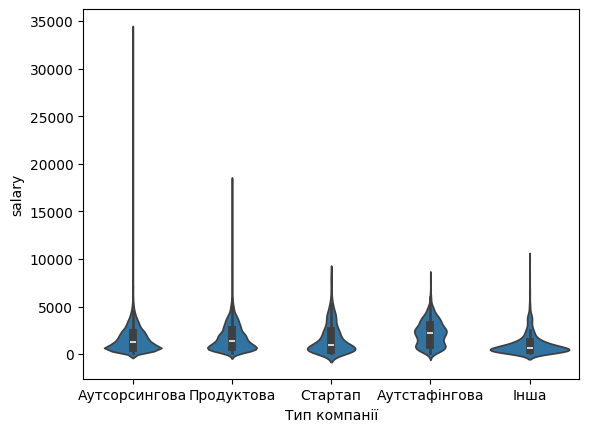

In [162]:
sns.violinplot(x="Тип компанії", y="salary", data=inpDf.loc[inpDf['Тип компанії'] != 'Аутстаффинговая'])

<Axes: xlabel='exp', ylabel='salary'>

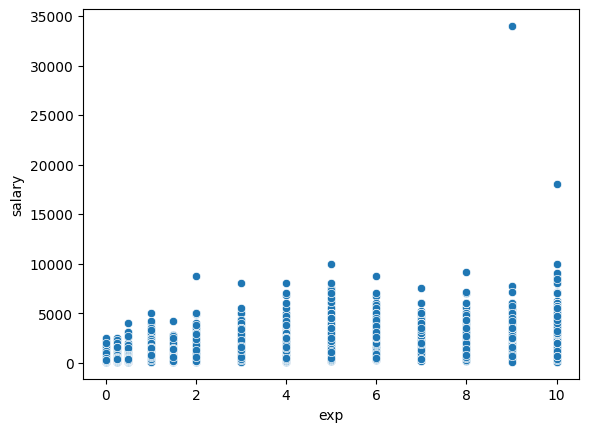

In [156]:
sns.scatterplot(x='exp', y='salary', data=inpDf)